 # IBM DS0720EN - Capstone Project
 Chris. -- https://github.com/chris-FR-GitHub/EDX-IBM

## Problem Statement
The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.  

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.  

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.  

## <font color=blue>Q1 : Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?</font>

### Preparatory stage

As specified in the **"Ingest the NYC 311 Dataset"** page, we uploaded a **10 million max** records file, containing the following columns : 
*created_date, unique_key, complaint_type, incident_zip, incident_address, street_name, address_type, city, resolution_description, borough, latitude, longitude, closed_date, location_type, status*

We stored this file in the input folder.

We named it : **NYC_311_Dataset.csv**

The file size is around 2.5 Gb.

### Load the data file

In [1]:
# Import required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the file in a dataframe
# As suggested in the "Ingest the NYC 311 Dataset" page : Parse the date fields by using the parse_dates option
df_all = pd.read_csv('./input/NYC_311_Dataset.csv', parse_dates = ['created_date', 'closed_date'])
# Display the 10 first rows
df_all.head(10)


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-28 20:26:11,45492325,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,NaT,RESIDENTIAL BUILDING,Open
1,2020-01-28 15:57:56,45493601,UNSANITARY CONDITION,11368.0,55-02 98 STREET,98 STREET,ADDRESS,Corona,The following complaint conditions are still o...,QUEENS,40.738846,-73.862785,NaT,RESIDENTIAL BUILDING,Open
2,2020-01-28 04:49:03,45494360,HEAT/HOT WATER,11225.0,181 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.657592,-73.954469,2020-01-28 21:37:27,RESIDENTIAL BUILDING,Closed
3,2020-01-28 18:07:16,45493438,PLUMBING,10454.0,514 EAST 138 STREET,EAST 138 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.807416,-73.918919,NaT,RESIDENTIAL BUILDING,Open
4,2020-01-28 14:10:04,45492347,HEAT/HOT WATER,10463.0,2800 BAILEY AVENUE,BAILEY AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.873356,-73.905554,NaT,RESIDENTIAL BUILDING,Open
5,2020-01-28 08:07:55,45492310,HEAT/HOT WATER,11225.0,1789 BEDFORD AVENUE,BEDFORD AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.662278,-73.957064,NaT,RESIDENTIAL BUILDING,Open
6,2020-01-28 21:11:02,45492265,HEAT/HOT WATER,11226.0,2815 BEVERLY ROAD,BEVERLY ROAD,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.645038,-73.950632,NaT,RESIDENTIAL BUILDING,Open
7,2020-01-28 07:27:16,45493379,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,NaT,RESIDENTIAL BUILDING,Open
8,2020-01-28 07:21:15,45494446,HEAT/HOT WATER,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537,NaT,RESIDENTIAL BUILDING,Open
9,2020-01-28 07:08:25,45493589,PLUMBING,11201.0,436 ALBEE SQUARE,ALBEE SQUARE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.690803,-73.983478,NaT,RESIDENTIAL BUILDING,Open


In [3]:
# Get the dataframe size
df_all.shape

(6015270, 15)

### Check NaN values

In [4]:
# Count NaN values in each column
df_NaN_count = df_all.isnull().sum(axis = 0)
df_NaN_count = df_NaN_count.to_frame()
df_NaN_count.rename(columns = {list(df_NaN_count)[0]:'Count'}, inplace=True)
df_NaN_count['NaN %'] = df_NaN_count['Count'] / len(df_all)
df_NaN_count['NaN %'] = df_NaN_count['NaN %'].map(lambda x: "{0:.2f}%".format(x*100))
df_NaN_count

,Count,NaN %
created_date,0,0.00%
unique_key,0,0.00%
complaint_type,0,0.00%
incident_zip,80704,1.34%
incident_address,52831,0.88%
street_name,52831,0.88%
address_type,84772,1.41%
city,80281,1.33%
resolution_description,7828,0.13%
borough,0,0.00%


No NaN values for the **complaint_type** and **status** columns.  
Some NaN in the **closed_date** column but it makes sense as only closed complaints have a closed date.

In [5]:
print ('Only' , df_all[df_all['status']== 'Closed']['closed_date'].isnull().sum(axis = 0), 
       'of', len(df_all[df_all['status']== 'Closed']), 'closed records have no closed date')

Only 197 of 5881368 closed records have no closed date


### Check unique values

In [6]:
#Check distinct complaint_type
df_all['complaint_type'].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'PLUMBING',
       'PAINT/PLASTER', 'DOOR/WINDOW', 'APPLIANCE', 'WATER LEAK',
       'ELECTRIC', 'GENERAL', 'FLOORING/STAIRS', 'SAFETY', 'ELEVATOR',
       'OUTSIDE BUILDING', 'Unsanitary Condition',
       'HPD Literature Request', 'HEATING', 'PAINT - PLASTER', 'Safety',
       'Electric', 'NONCONST', 'CONSTRUCTION', 'GENERAL CONSTRUCTION',
       'General', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT',
       'Outside Building', 'Plumbing', 'Appliance', 'Mold'], dtype=object)

In [7]:
#Check distinct Status
df_all['status'].unique()

array(['Open', 'Closed', 'Assigned', 'In Progress', 'Pending'],
      dtype=object)

### Count by complaint_type

In [8]:
def getCountAndPercent(col):
    df = pd.concat([col.value_counts(),              
                    col.value_counts(normalize=True).mul(100).map(lambda x: "{0:.2f}%".format(x))],
                   axis=1,
                   keys=('Count','Percentage'))
    return df

#get the count and percentage
df_complaint_type = getCountAndPercent( df_all['complaint_type'])
df_complaint_type.head(10)

,Count,Percentage
HEAT/HOT WATER,1258260,20.92%
HEATING,887869,14.76%
PLUMBING,710913,11.82%
GENERAL CONSTRUCTION,500863,8.33%
UNSANITARY CONDITION,451299,7.50%
PAINT - PLASTER,361257,6.01%
PAINT/PLASTER,346329,5.76%
ELECTRIC,307214,5.11%
NONCONST,260890,4.34%
DOOR/WINDOW,205140,3.41%


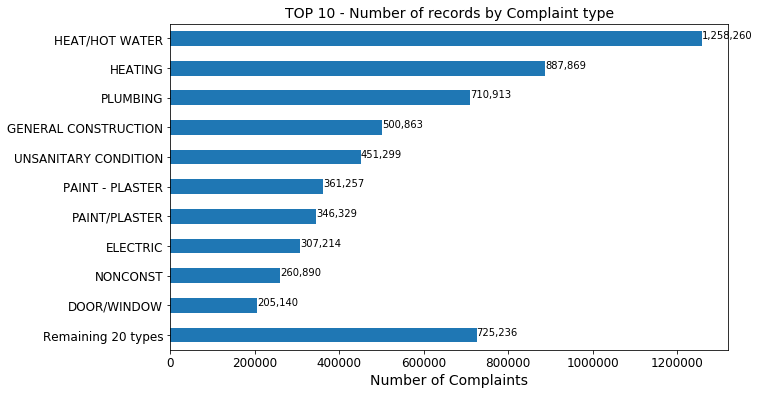

In [9]:
# plot the count
def plotTOP10(df, strTitle):
    # TOP 10 and an OTHER type
    top10_other = df.head(10)
    if len(df) > 10:
        top10_other['Remaining {0} types'.format(len(df) - 10)] = sum(df[10:])

    top10_other.plot(kind='barh', figsize=(10, 6),fontsize=12)
    plt.xlabel('Number of Complaints',fontsize=14)
    plt.title(strTitle, fontsize=14)
    plt.gca().invert_yaxis()
    [plt.text(v, i, '{:,d}'.format(v)) for i, v in enumerate(top10_other)];
    plt.show()
    
plotTOP10(df_complaint_type['Count'], 'TOP 10 - Number of records by Complaint type')



If we follow the Quizz, we can merge the **HEAT/HOT WATER** & **HEATING** types.

In [10]:
# Merge the 'HEAT/HOT WATER' & 'HEATING' types
df_all['complaint_type'].replace(
    to_replace=['HEAT/HOT WATER', 'HEATING'],
    value='HEATING/HOT WATER',
    inplace=True
)
#get the count and percentage
df_complaint_type = getCountAndPercent( df_all['complaint_type'])

df_complaint_type.head(10)


,Count,Percentage
HEATING/HOT WATER,2146129,35.68%
PLUMBING,710913,11.82%
GENERAL CONSTRUCTION,500863,8.33%
UNSANITARY CONDITION,451299,7.50%
PAINT - PLASTER,361257,6.01%
PAINT/PLASTER,346329,5.76%
ELECTRIC,307214,5.11%
NONCONST,260890,4.34%
DOOR/WINDOW,205140,3.41%
WATER LEAK,193521,3.22%


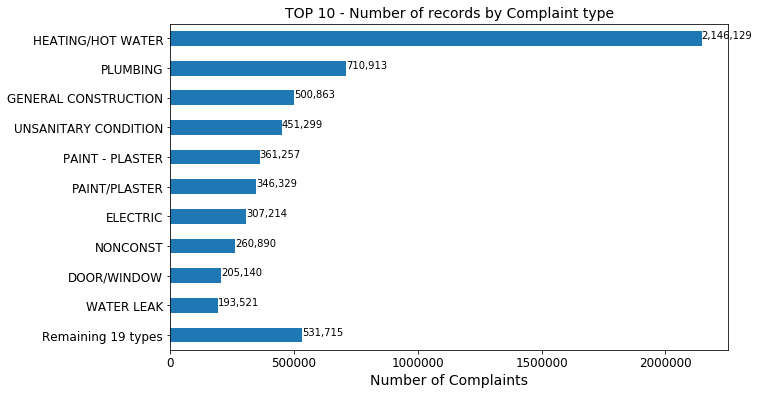

In [11]:
# plot
plotTOP10(df_complaint_type['Count'], 'TOP 10 - Number of records by Complaint type')

####  <font color="blue">The Department of Housing Preservation and Development of New York City should address **both of 'Heat/Hot Water' and 'Heating'** complaint types first.</font>

### Extra check : Closed Complaints resolution time (in Days)

In [12]:
df_closed = df_all[df_all['status'] == 'Closed'][['complaint_type', 'created_date','closed_date']]
df_closed.shape

(5881368, 3)

In [13]:
# Compute delta between open and closed dates.
df_closed[['created_date','closed_date']] = df_closed[['created_date','closed_date']].apply(pd.to_datetime)
df_closed['Delta in Days'] = (df_closed['closed_date'] - df_closed['created_date']).dt.days
# drop records containing NaNs
df_closed.dropna(inplace=True)
df_closed.head(5)

,complaint_type,created_date,closed_date,Delta in Days
2,HEATING/HOT WATER,2020-01-28 04:49:03,2020-01-28 21:37:27,0.0
12,HEATING/HOT WATER,2020-01-28 16:57:34,2020-01-28 21:37:43,0.0
19,HEATING/HOT WATER,2020-01-28 16:49:00,2020-01-28 17:40:01,0.0
35,HEATING/HOT WATER,2020-01-28 13:38:52,2020-01-28 17:40:01,0.0
41,HEATING/HOT WATER,2020-01-28 04:45:39,2020-01-28 15:58:43,0.0


In [14]:
def Percentile25(g):
    return np.percentile(g, 25)

def Percentile75(g):
    return np.percentile(g, 75)

df_closed_avg = df_closed.pivot_table(index=['complaint_type'],
                    values='Delta in Days',
                    aggfunc=('min',Percentile25,'mean','median',Percentile75,'max','count')).reset_index()
df_closed_avg = df_closed_avg[['complaint_type', 'count', 'min', 'Percentile25',  'mean', 'median','Percentile75', 'max']]
# List top 10 complaint types
df_closed_avg.sort_values(by='count', ascending=False).head(10)


,complaint_type,count,min,Percentile25,mean,median,Percentile75,max
12,HEATING/HOT WATER,2130132,0.0,1.0,3.166615,3.0,4.0,1686.0
19,PLUMBING,684785,0.0,5.0,16.129387,10.0,20.0,1207.0
10,GENERAL CONSTRUCTION,471196,0.0,5.0,14.798211,10.0,20.0,733.0
24,UNSANITARY CONDITION,447614,0.0,6.0,22.059891,13.0,23.0,1881.0
18,PAINT/PLASTER,344627,0.0,5.0,17.799331,11.0,19.0,2835.0
17,PAINT - PLASTER,339589,0.0,5.0,14.430515,10.0,19.0,726.0
5,ELECTRIC,297951,0.0,5.0,16.629372,10.0,19.0,1207.0
14,NONCONST,245582,0.0,5.0,18.203065,11.0,21.0,1207.0
4,DOOR/WINDOW,203888,0.0,6.0,18.742265,12.0,21.0,1889.0
27,WATER LEAK,192112,0.0,6.0,19.040653,12.0,21.0,1231.0


There are a lot of outliers (see max column).  
The "HEATING/HOT WATER" complaints are closed around the 3 days.  
The other types are closed in 10 to 14 days.  

### Non Closed complaints

If we check the non-closed complaints ('Open', 'Assigned', 'In Progress', 'Pending'), the result is a little bit different.

In [15]:
df_complaint_type_notclosed = getCountAndPercent(df_all[df_all['status']!= 'Closed']['complaint_type'])
df_complaint_type_notclosed.head(10)

,Count,Percentage
GENERAL CONSTRUCTION,29623,22.12%
PLUMBING,26086,19.48%
PAINT - PLASTER,21647,16.17%
HEATING/HOT WATER,15962,11.92%
NONCONST,15278,11.41%
ELECTRIC,9250,6.91%
APPLIANCE,3793,2.83%
UNSANITARY CONDITION,3685,2.75%
PAINT/PLASTER,1702,1.27%
WATER LEAK,1409,1.05%


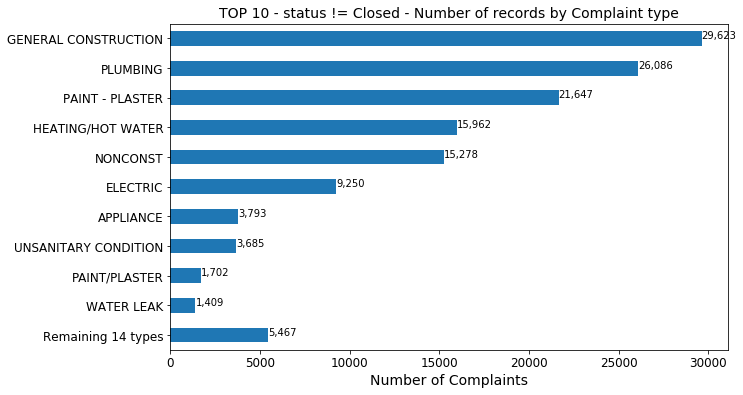

In [16]:
# plot
plotTOP10(df_complaint_type_notclosed['Count'], 'TOP 10 - status != Closed - Number of records by Complaint type')

If we only check "Non Closed" complaints, GENERAL CONSTRUCTION type have the more complaints. 

## <font color=blue>Q1 Conclusion</font>

- <font color="blue">The Department of Housing Preservation and Development of New York City should address **both of 'Heat/Hot Water' and 'Heating'** complaint types first. They represent around 2.1 millions complaints (35%).</font>  
- <font color="blue">The total number of *General Construction* complaints is **above 500,000**.</font>  